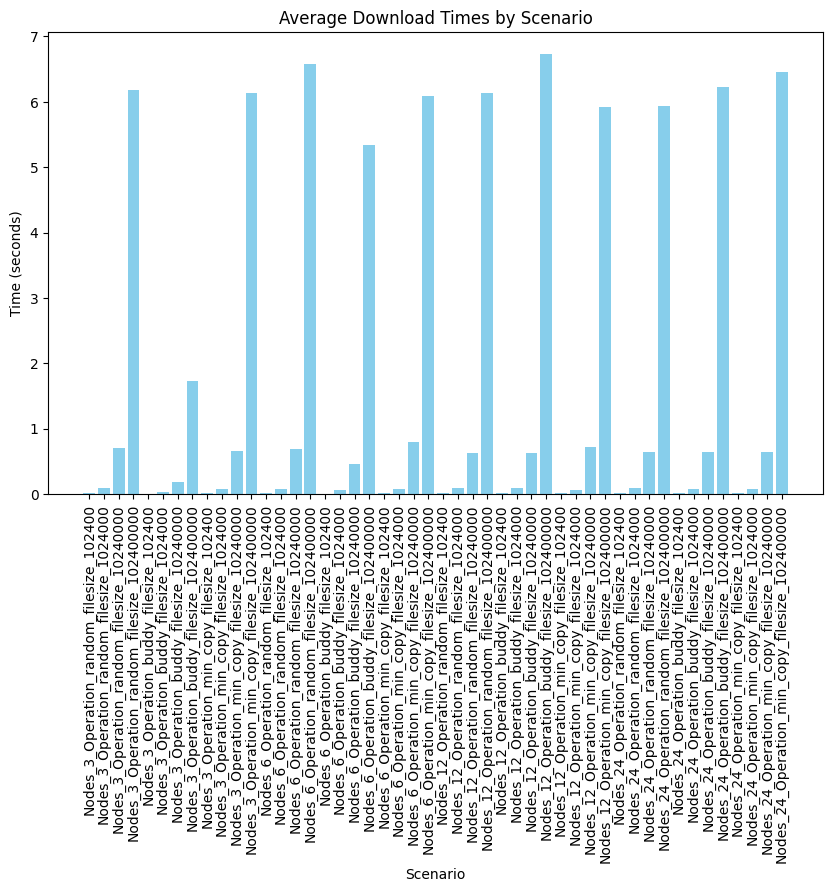

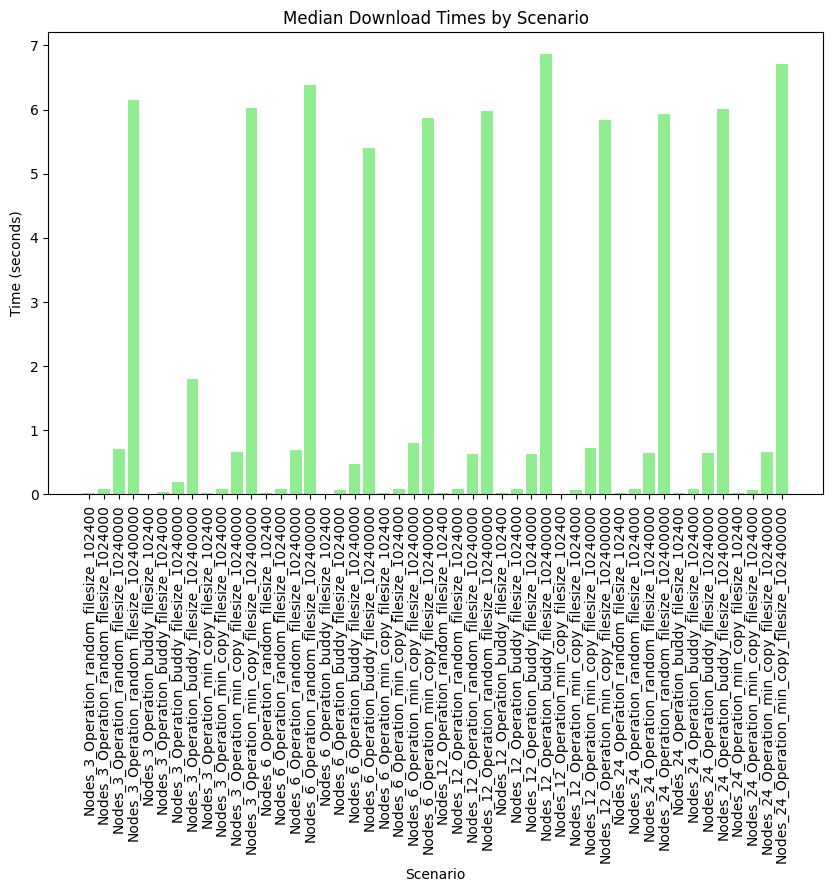

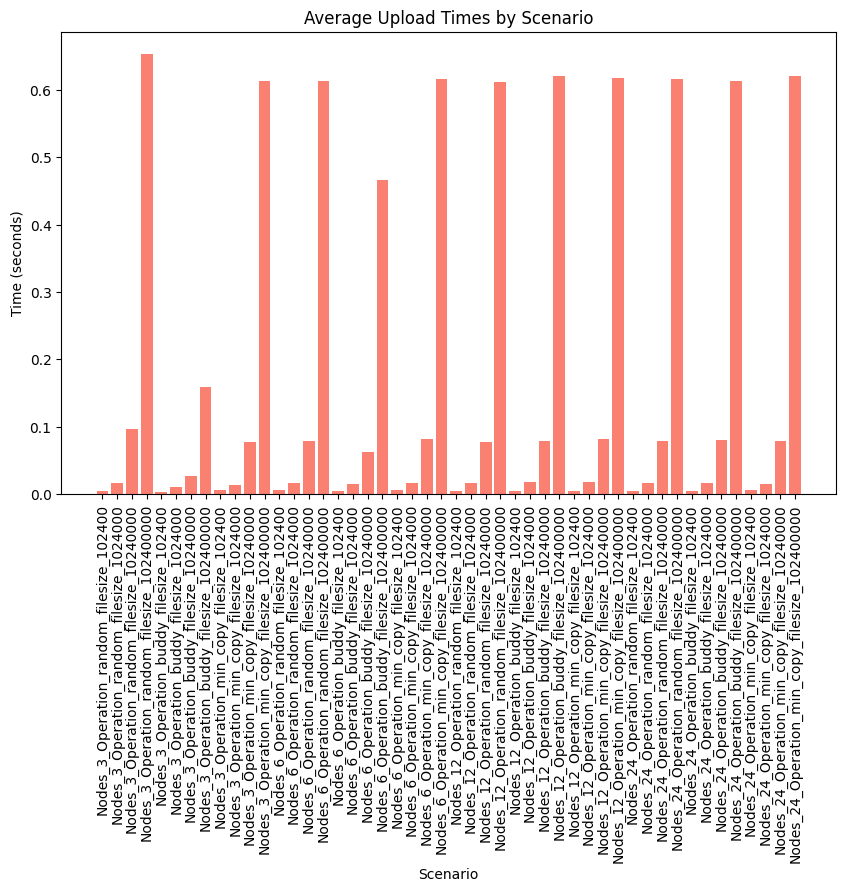

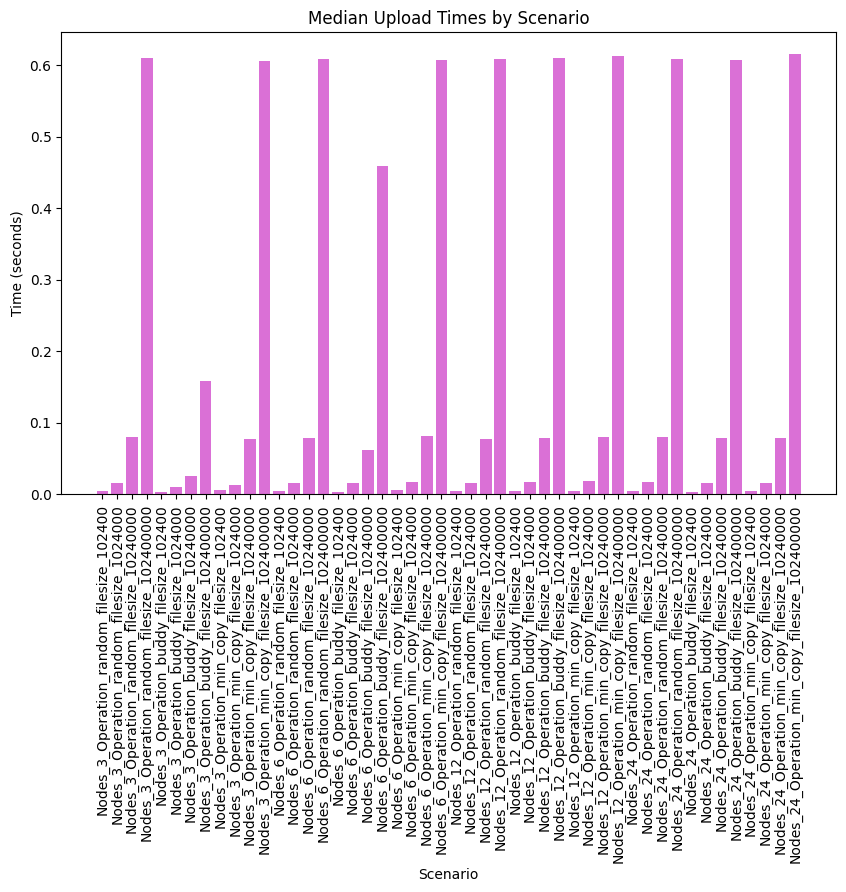

In [1]:
# Import required libraries
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the JSON data
with open('testresult.json', 'r') as file:
    data = json.load(file)

# Define a function to calculate the average and median times
def calculate_stats(times):
    return np.mean(times), np.median(times)

# Initialize lists to store results
scenarios = []
average_download_times = []
median_download_times = []
average_upload_times = []
median_upload_times = []

# Analyze data
for key, value in data.items():
    # Calculate average and median download times
    avg_download_time, med_download_time = calculate_stats(value['download_time'])
    average_download_times.append(avg_download_time)
    median_download_times.append(med_download_time)

    # Calculate average and median upload times
    avg_upload_time, med_upload_time = calculate_stats(value['upload_time'])
    average_upload_times.append(avg_upload_time)
    median_upload_times.append(med_upload_time)
    
    # Append the scenario name for labeling purposes
    scenarios.append(key.replace(':', '_'))  # Sanitize the key to use as a label

# Plot average download times
plt.figure(figsize=(10, 6))
plt.bar(scenarios, average_download_times, color='skyblue')
plt.xticks(rotation=90)  # Rotate scenario names for better readability
plt.title('Average Download Times by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Time (seconds)')
plt.show()

# Plot median download times
plt.figure(figsize=(10, 6))
plt.bar(scenarios, median_download_times, color='lightgreen')
plt.xticks(rotation=90)
plt.title('Median Download Times by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Time (seconds)')
plt.show()

# Plot average upload times
plt.figure(figsize=(10, 6))
plt.bar(scenarios, average_upload_times, color='salmon')
plt.xticks(rotation=90)
plt.title('Average Upload Times by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Time (seconds)')
plt.show()

# Plot median upload times
plt.figure(figsize=(10, 6))
plt.bar(scenarios, median_upload_times, color='orchid')
plt.xticks(rotation=90)
plt.title('Median Upload Times by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Time (seconds)')
plt.show()

# NOTE: Replace 'testresult.json' with the actual path to your JSON file.


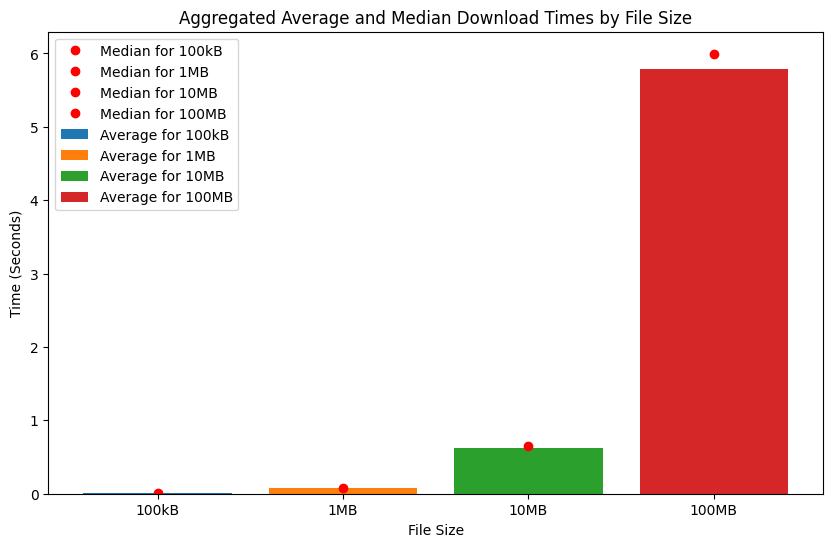

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the JSON data
with open('testresult.json', 'r') as file:
    data = json.load(file)

# Function to calculate the average and median times
def calculate_stats(times):
    return np.mean(times), np.median(times)

# Function to convert file size from bytes to kB/MB
def format_file_size(file_size_bytes):
    size_map = {
        '102400': '100kB',
        '1024000': '1MB',
        '10240000': '10MB',
        '102400000': '100MB'
    }
    return size_map.get(file_size_bytes, 'Unknown')

# Initialize lists to store aggregated data
file_sizes = ['100kB', '1MB', '10MB', '100MB']
average_download_times = {size: [] for size in file_sizes}
median_download_times = {size: [] for size in file_sizes}

# Aggregate data
for scenario, values in data.items():
    # Extract the file size in bytes from the scenario name and format it
    file_size_bytes = scenario.split(':')[-1]
    formatted_file_size = format_file_size(file_size_bytes)
    if formatted_file_size != 'Unknown':  # Only process known file sizes
        avg_time, median_time = calculate_stats(values['download_time'])
        average_download_times[formatted_file_size].append(avg_time)
        median_download_times[formatted_file_size].append(median_time)

# Plot aggregated results
plt.figure(figsize=(10, 6))
for file_size in file_sizes:
    avg_times = average_download_times[file_size]
    med_times = median_download_times[file_size]
    # Take the overall average and median across all scenarios for each file size
    overall_avg = np.mean(avg_times)
    overall_median = np.median(med_times)
    plt.bar(file_size, overall_avg, label=f'Average for {file_size}')
    plt.plot(file_size, overall_median, 'ro', label=f'Median for {file_size}')

plt.title('Aggregated Average and Median Download Times by File Size')
plt.xlabel('File Size')
plt.ylabel('Time (Seconds)')
plt.legend()
plt.show()


In [7]:
import json
import numpy as np
import pandas as pd

# Load the JSON data
with open('testresult.json', 'r') as file:
    data = json.load(file)

# Function to calculate summary statistics
def calculate_summary_statistics(times):
    return {
        'mean': np.mean(times),
        'median': np.median(times),
        'min': np.min(times),
        'max': np.max(times)
    }

# Mapping bytes to file sizes for the summary table
file_size_mapping = {
    '102400': '100kB',
    '1024000': '1MB',
    '10240000': '10MB',
    '102400000': '100MB'
}

# Initialize a list to store the summary statistics for each file size
summary_statistics = []

# Process data and calculate summary statistics
for scenario, values in data.items():
    # Extract the file size in bytes from the scenario name
    file_size_bytes = scenario.split(':')[-1]
    file_size_label = file_size_mapping.get(file_size_bytes, None)
    
    # If the file size is in our mapping, calculate and store the statistics
    if file_size_label:
        stats = calculate_summary_statistics(values['download_time'])
        stats['File Size'] = file_size_label
        summary_statistics.append(stats)

# Convert the summary statistics to a pandas DataFrame for display and analysis
summary_df_list = [pd.DataFrame([stats]) for stats in summary_statistics]
summary_df = pd.concat(summary_df_list)

# Calculate the overall statistics across all scenarios for each file size
overall_stats = summary_df.groupby('File Size').agg({
    'mean': 'mean',
    'median': 'median',
    'min': 'min',
    'max': 'max'
})

# Display the summary table
overall_stats.reset_index(inplace=True)
display(overall_stats.set_index('File Size'))


,mean,median,min,max
File Size,,,,
100MB,5.788158,5.996714,1.180406,7.846371
100kB,0.009807,0.009523,0.001672,0.057020
10MB,0.618469,0.646499,0.106271,0.884968
1MB,0.075321,0.075789,0.012743,0.217770


In [5]:
import json
import numpy as np
import pandas as pd

# Load the JSON data
with open('testresult.json', 'r') as file:
    data = json.load(file)

# Function to calculate summary statistics
def calculate_summary_statistics(times):
    return {
        'Mean': np.mean(times),
        'Median': np.median(times),
        'Min': np.min(times),
        'Max': np.max(times)
    }

# Initialize a list to store the summary statistics for each scenario
summary_statistics = []

# Process data and calculate summary statistics for each scenario
for scenario, values in data.items():
    stats = calculate_summary_statistics(values['download_time'])
    stats['Scenario'] = scenario  # Add the scenario as a column
    summary_statistics.append(stats)

# Convert the summary statistics to pandas DataFrames and then concatenate them
summary_df_list = [pd.DataFrame([stats]) for stats in summary_statistics]
summary_df = pd.concat(summary_df_list, ignore_index=True)

# Display the summary table
summary_df = summary_df[['Scenario', 'Mean', 'Median', 'Min', 'Max']]  # Reorder columns for readability
display(summary_df)


,Scenario,Mean,Median,Min,Max
0,Nodes:3_Operation:random_filesize:102400,0.012806,0.011735,0.008396,0.030264
1,Nodes:3_Operation:random_filesize:1024000,0.090248,0.087075,0.058166,0.217770
2,Nodes:3_Operation:random_filesize:10240000,0.709642,0.706146,0.539150,0.856000
3,Nodes:3_Operation:random_filesize:102400000,6.185936,6.142883,4.595715,7.714518
4,Nodes:3_Operation:buddy_filesize:102400,0.003819,0.003521,0.001672,0.009150
5,Nodes:3_Operation:buddy_filesize:1024000,0.035576,0.035234,0.012743,0.083058
6,Nodes:3_Operation:buddy_filesize:10240000,0.184033,0.181823,0.106271,0.315671
7,Nodes:3_Operation:buddy_filesize:102400000,1.725770,1.799199,1.180406,2.123780
8,Nodes:3_Operation:min_copy_filesize:102400,0.009996,0.009636,0.007071,0.031726
9,Nodes:3_Operation:min_copy_filesize:1024000,0.079174,0.077260,0.057478,0.114915


In [8]:
#Download time

import json
import numpy as np
import pandas as pd

# Load the JSON data
with open('testresult.json', 'r') as file:
    data = json.load(file)

# Function to calculate summary statistics
def calculate_summary_statistics(times):
    return {
        'Mean': np.mean(times),
        'Median': np.median(times),
        'Min': np.min(times),
        'Max': np.max(times)
    }

# Initialize a list to store the summary statistics for each scenario
summary_statistics = []

# Process data and calculate summary statistics for each scenario
for scenario, values in data.items():
    stats = calculate_summary_statistics(values['download_time'])
    stats['Scenario'] = scenario  # Add the scenario as a column
    # Determine the scenario type
    if "random" in scenario:
        stats['Type'] = 'Random'
    elif "buddy" in scenario:
        stats['Type'] = 'Buddy'
    elif "min_copy" in scenario:
        stats['Type'] = 'MinCopy'
    summary_statistics.append(stats)

# Convert the summary statistics to pandas DataFrames and then concatenate them
summary_df_list = [pd.DataFrame([stats]) for stats in summary_statistics]
summary_df = pd.concat(summary_df_list, ignore_index=True)

# Filter the DataFrame into three separate DataFrames based on the scenario type
random_df = summary_df[summary_df['Type'] == 'Random']
buddy_df = summary_df[summary_df['Type'] == 'Buddy']
min_copy_df = summary_df[summary_df['Type'] == 'MinCopy']

# Display the summary tables for each type
display(random_df[['Scenario', 'Mean', 'Median', 'Min', 'Max']])
display(buddy_df[['Scenario', 'Mean', 'Median', 'Min', 'Max']])
display(min_copy_df[['Scenario', 'Mean', 'Median', 'Min', 'Max']])


,Scenario,Mean,Median,Min,Max
0,Nodes:3_Operation:random_filesize:102400,0.012806,0.011735,0.008396,0.030264
1,Nodes:3_Operation:random_filesize:1024000,0.090248,0.087075,0.058166,0.217770
2,Nodes:3_Operation:random_filesize:10240000,0.709642,0.706146,0.539150,0.856000
3,Nodes:3_Operation:random_filesize:102400000,6.185936,6.142883,4.595715,7.714518
12,Nodes:6_Operation:random_filesize:102400,0.010678,0.009568,0.006572,0.047189
13,Nodes:6_Operation:random_filesize:1024000,0.076791,0.075580,0.059157,0.111363
14,Nodes:6_Operation:random_filesize:10240000,0.691553,0.688128,0.502887,0.870971
15,Nodes:6_Operation:random_filesize:102400000,6.582467,6.376532,4.983125,7.751912
24,Nodes:12_Operation:random_filesize:102400,0.011847,0.010898,0.007259,0.057020
25,Nodes:12_Operation:random_filesize:1024000,0.086892,0.082926,0.055216,0.183244


,Scenario,Mean,Median,Min,Max
4,Nodes:3_Operation:buddy_filesize:102400,0.003819,0.003521,0.001672,0.009150
5,Nodes:3_Operation:buddy_filesize:1024000,0.035576,0.035234,0.012743,0.083058
6,Nodes:3_Operation:buddy_filesize:10240000,0.184033,0.181823,0.106271,0.315671
7,Nodes:3_Operation:buddy_filesize:102400000,1.725770,1.799199,1.180406,2.123780
16,Nodes:6_Operation:buddy_filesize:102400,0.008184,0.007755,0.005388,0.030240
17,Nodes:6_Operation:buddy_filesize:1024000,0.068195,0.064008,0.044303,0.162927
18,Nodes:6_Operation:buddy_filesize:10240000,0.464784,0.463296,0.269865,0.597883
19,Nodes:6_Operation:buddy_filesize:102400000,5.335839,5.393221,4.280366,6.095317
28,Nodes:12_Operation:buddy_filesize:102400,0.009980,0.009641,0.007041,0.018523
29,Nodes:12_Operation:buddy_filesize:1024000,0.085817,0.084115,0.058545,0.182267


,Scenario,Mean,Median,Min,Max
8,Nodes:3_Operation:min_copy_filesize:102400,0.009996,0.009636,0.007071,0.031726
9,Nodes:3_Operation:min_copy_filesize:1024000,0.079174,0.077260,0.057478,0.114915
10,Nodes:3_Operation:min_copy_filesize:10240000,0.661370,0.663927,0.538939,0.755705
11,Nodes:3_Operation:min_copy_filesize:102400000,6.138212,6.027983,5.412744,7.606320
20,Nodes:6_Operation:min_copy_filesize:102400,0.009875,0.009478,0.007441,0.035386
21,Nodes:6_Operation:min_copy_filesize:1024000,0.076017,0.073862,0.063624,0.125654
22,Nodes:6_Operation:min_copy_filesize:10240000,0.800104,0.803674,0.655815,0.884968
23,Nodes:6_Operation:min_copy_filesize:102400000,6.091198,5.875640,5.356555,7.385765
32,Nodes:12_Operation:min_copy_filesize:102400,0.009409,0.009228,0.006623,0.016320
33,Nodes:12_Operation:min_copy_filesize:1024000,0.068520,0.065655,0.056339,0.129965


In [4]:
#upload time

import json
import numpy as np
import pandas as pd

# Load the JSON data
with open('testresult.json', 'r') as file:
    data = json.load(file)

# Function to calculate summary statistics
def calculate_summary_statistics(times):
    return {
        'Mean': np.mean(times),
        'Median': np.median(times),
        'Min': np.min(times),
        'Max': np.max(times)
    }

# Initialize a list to store the summary statistics for each scenario
summary_statistics = []

# Process data and calculate summary statistics for each scenario
for scenario, values in data.items():
    stats = calculate_summary_statistics(values['upload_time'])
    stats['Scenario'] = scenario  # Add the scenario as a column
    # Determine the scenario type
    if "random" in scenario:
        stats['Type'] = 'Random'
    elif "buddy" in scenario:
        stats['Type'] = 'Buddy'
    elif "min_copy" in scenario:
        stats['Type'] = 'MinCopy'
    summary_statistics.append(stats)

# Convert the summary statistics to pandas DataFrames and then concatenate them
summary_df_list = [pd.DataFrame([stats]) for stats in summary_statistics]
summary_df = pd.concat(summary_df_list, ignore_index=True)

# Filter the DataFrame into three separate DataFrames based on the scenario type
random_df = summary_df[summary_df['Type'] == 'Random']
buddy_df = summary_df[summary_df['Type'] == 'Buddy']
min_copy_df = summary_df[summary_df['Type'] == 'MinCopy']

# Display the summary tables for each type
display(random_df[['Scenario', 'Mean', 'Median', 'Min', 'Max']])
display(buddy_df[['Scenario', 'Mean', 'Median', 'Min', 'Max']])
display(min_copy_df[['Scenario', 'Mean', 'Median', 'Min', 'Max']])


,Scenario,Mean,Median,Min,Max
0,Nodes:3_Operation:random_filesize:102400,0.004911,0.004245,0.000000,0.016172
1,Nodes:3_Operation:random_filesize:1024000,0.016301,0.016105,0.006636,0.051173
2,Nodes:3_Operation:random_filesize:10240000,0.096468,0.080269,0.063060,0.172295
3,Nodes:3_Operation:random_filesize:102400000,0.653503,0.610667,0.594608,1.293169
12,Nodes:6_Operation:random_filesize:102400,0.005705,0.003739,0.002137,0.014481
13,Nodes:6_Operation:random_filesize:1024000,0.015917,0.015788,0.007514,0.026145
14,Nodes:6_Operation:random_filesize:10240000,0.079119,0.078377,0.066451,0.114242
15,Nodes:6_Operation:random_filesize:102400000,0.612934,0.608413,0.592737,0.787640
24,Nodes:12_Operation:random_filesize:102400,0.005304,0.003682,0.002125,0.014390
25,Nodes:12_Operation:random_filesize:1024000,0.016342,0.016013,0.005767,0.031576


,Scenario,Mean,Median,Min,Max
4,Nodes:3_Operation:buddy_filesize:102400,0.002863,0.002778,0.000000,0.013916
5,Nodes:3_Operation:buddy_filesize:1024000,0.010022,0.009422,0.000000,0.018965
6,Nodes:3_Operation:buddy_filesize:10240000,0.026576,0.025607,0.016807,0.048774
7,Nodes:3_Operation:buddy_filesize:102400000,0.159003,0.158584,0.142793,0.179133
16,Nodes:6_Operation:buddy_filesize:102400,0.004502,0.002894,0.001588,0.011455
17,Nodes:6_Operation:buddy_filesize:1024000,0.014342,0.014986,0.005726,0.026446
18,Nodes:6_Operation:buddy_filesize:10240000,0.062506,0.061033,0.050566,0.097899
19,Nodes:6_Operation:buddy_filesize:102400000,0.466279,0.458318,0.445476,0.615249
28,Nodes:12_Operation:buddy_filesize:102400,0.004873,0.003838,0.002005,0.012198
29,Nodes:12_Operation:buddy_filesize:1024000,0.017423,0.017573,0.007214,0.037300


,Scenario,Mean,Median,Min,Max
8,Nodes:3_Operation:min_copy_filesize:102400,0.006653,0.005727,0.001736,0.014178
9,Nodes:3_Operation:min_copy_filesize:1024000,0.013489,0.012524,0.006915,0.025726
10,Nodes:3_Operation:min_copy_filesize:10240000,0.077627,0.077196,0.066029,0.099024
11,Nodes:3_Operation:min_copy_filesize:102400000,0.612922,0.606171,0.590136,0.699491
20,Nodes:6_Operation:min_copy_filesize:102400,0.006357,0.005545,0.002285,0.014973
21,Nodes:6_Operation:min_copy_filesize:1024000,0.016384,0.016645,0.006936,0.027342
22,Nodes:6_Operation:min_copy_filesize:10240000,0.081962,0.081513,0.065623,0.117090
23,Nodes:6_Operation:min_copy_filesize:102400000,0.615913,0.607195,0.595070,0.720338
32,Nodes:12_Operation:min_copy_filesize:102400,0.005218,0.004193,0.002190,0.015548
33,Nodes:12_Operation:min_copy_filesize:1024000,0.017512,0.017739,0.006806,0.029027


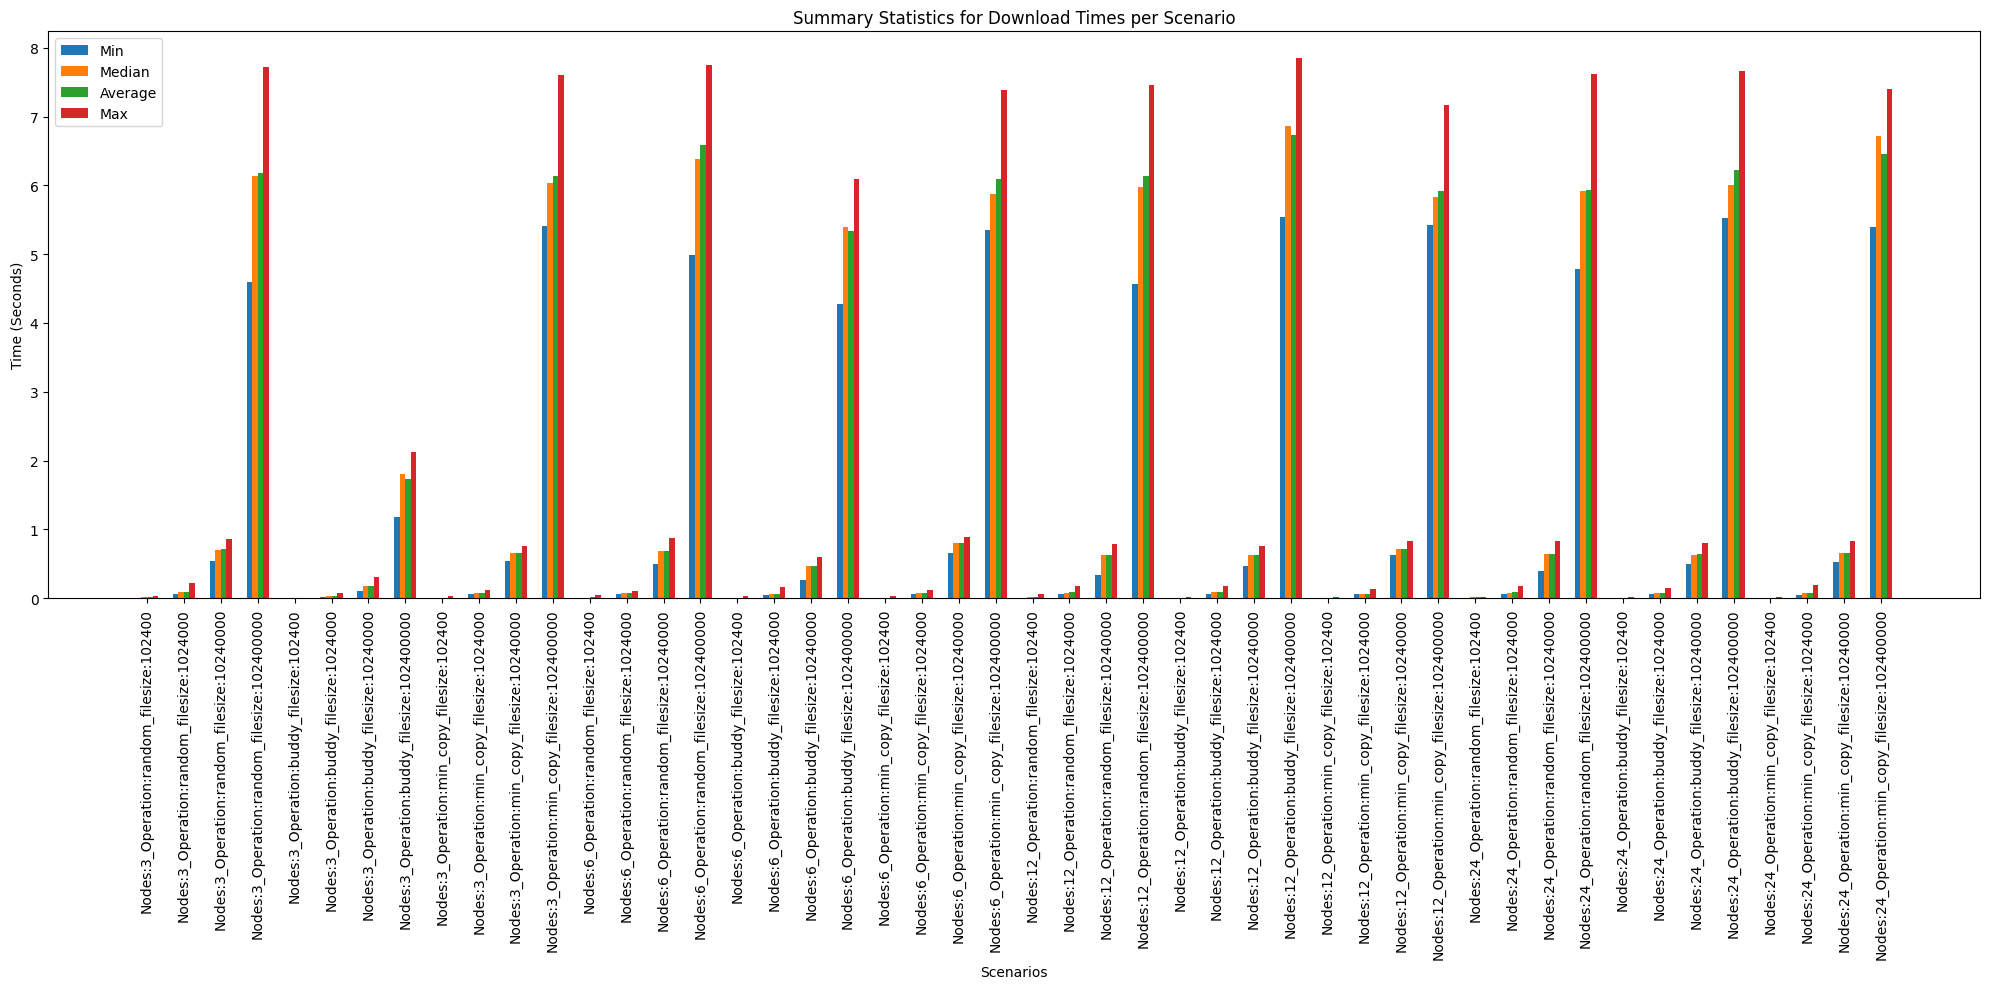

In [30]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the JSON data
with open('testresult.json', 'r') as file:
    data = json.load(file)

# Function to calculate the summary statistics
def calculate_summary_stats(times):
    return np.min(times), np.median(times), np.mean(times), np.max(times)

# Initialize lists to store data for plotting
scenarios = []
min_times = []
median_times = []
average_times = []
max_times = []

# Process data for each scenario
for scenario, values in data.items():
    # Calculate summary statistics
    min_time, median_time, avg_time, max_time = calculate_summary_stats(values['download_time'])
    
    # Append data for plotting
    scenarios.append(scenario)  # Or use a shortened version if necessary
    min_times.append(min_time)
    median_times.append(median_time)
    average_times.append(avg_time)
    max_times.append(max_time)

# Create an array with the position of each group of bars
bar_width = 0.15
indices = np.arange(len(scenarios))

# Plotting
plt.figure(figsize=(20, 10))

plt.bar(indices - bar_width*1.5, min_times, bar_width, label='Min')
plt.bar(indices - bar_width/2, median_times, bar_width, label='Median')
plt.bar(indices + bar_width/2, average_times, bar_width, label='Average')
plt.bar(indices + bar_width*1.5, max_times, bar_width, label='Max')

# Add labels, title, and legend
plt.xlabel('Scenarios')
plt.ylabel('Time (Seconds)')
plt.title('Summary Statistics for Download Times per Scenario')
#plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xticks(indices, scenarios, rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the padding to make room for the rotated x-labels
plt.show()


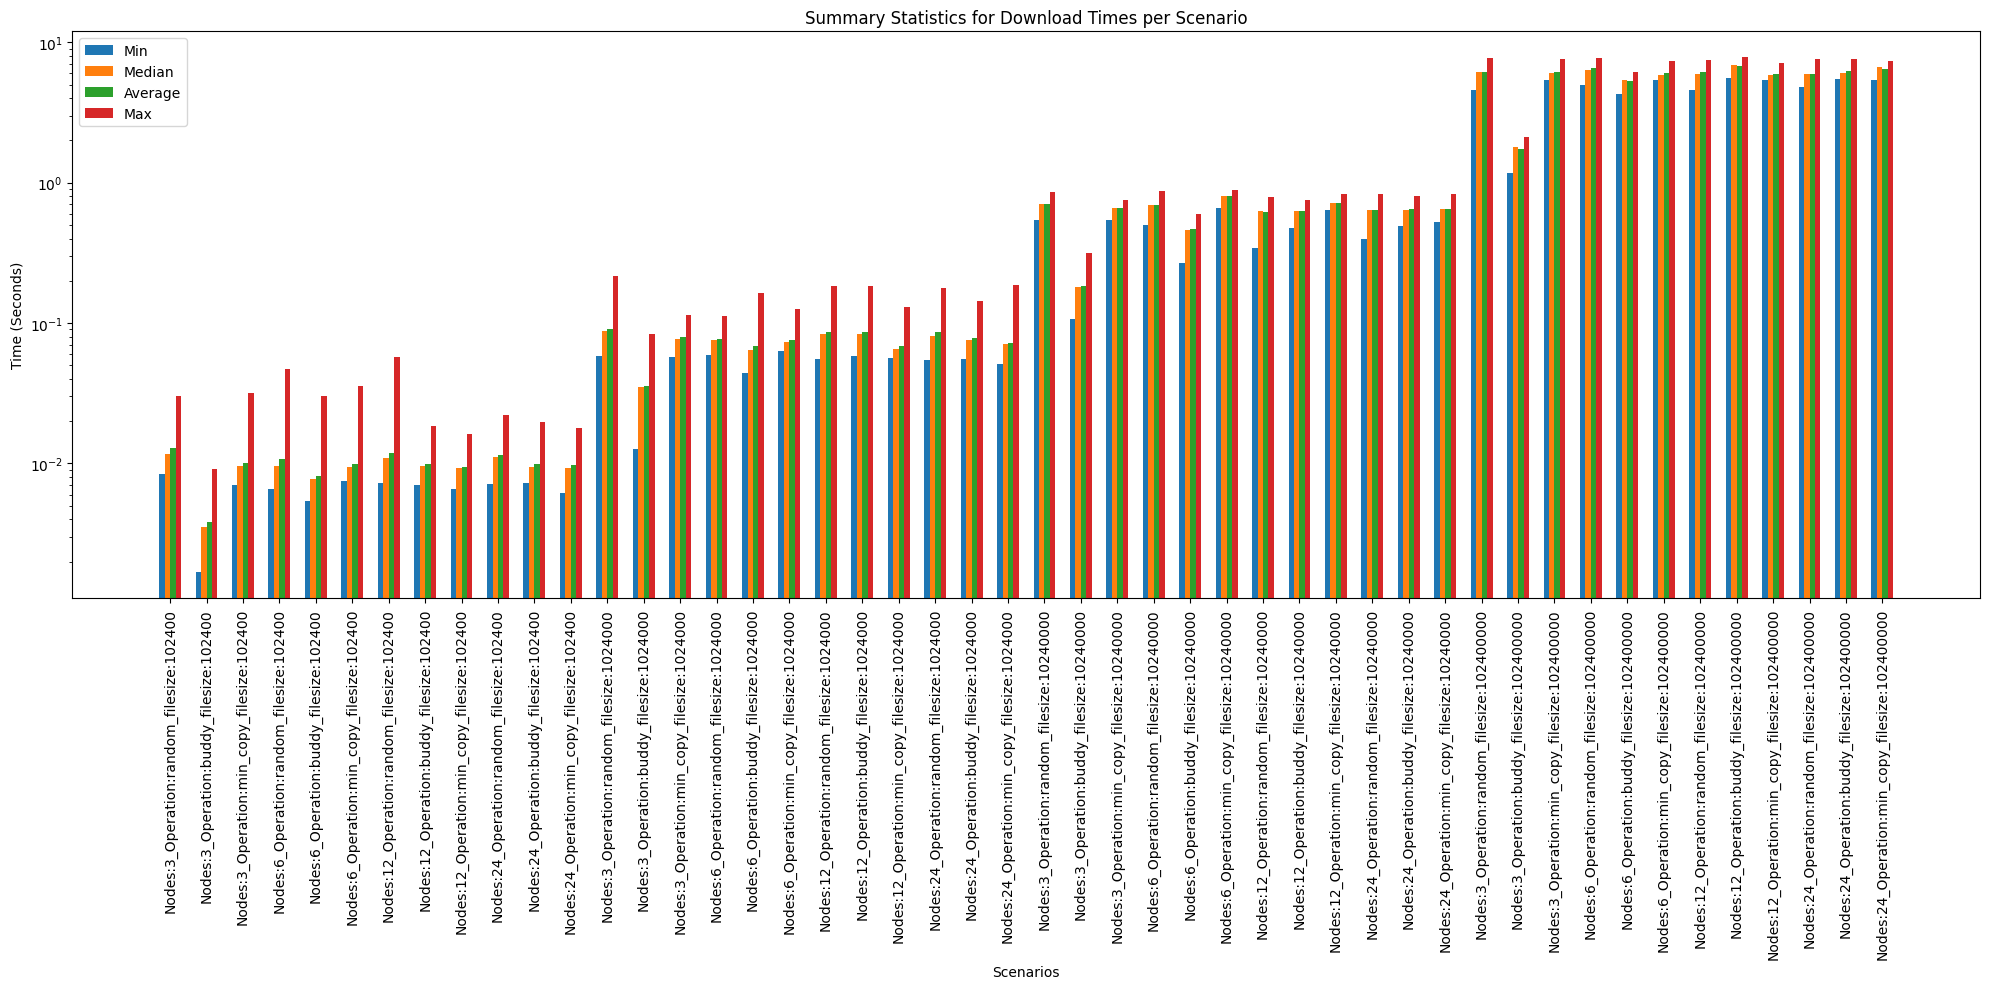

In [26]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the JSON data
with open('testresult.json', 'r') as file:
    data = json.load(file)

# Function to calculate the summary statistics
def calculate_summary_stats(times):
    return np.min(times), np.median(times), np.mean(times), np.max(times)

# Function to extract and return the file size in bytes from the scenario name
def extract_file_size(scenario):
    size_part = scenario.split('_')[-1]
    size_in_bytes = int(size_part.split(':')[1])
    return size_in_bytes

# Initialize lists to store data for plotting
scenario_data = []

# Process data for each scenario
for scenario, values in data.items():
    # Calculate summary statistics
    min_time, median_time, avg_time, max_time = calculate_summary_stats(values['download_time'])
    
    # Get the file size in bytes to use for sorting
    file_size_in_bytes = extract_file_size(scenario)
    
    # Append data for plotting
    scenario_data.append({
        'scenario': scenario,
        'min': min_time,
        'median': median_time,
        'average': avg_time,
        'max': max_time,
        'file_size': file_size_in_bytes  # Include file size for sorting
    })

# Sort scenarios by file size
scenario_data.sort(key=lambda x: x['file_size'])

# Separate the data into individual lists for plotting
scenarios = [d['scenario'] for d in scenario_data]
min_times = [d['min'] for d in scenario_data]
median_times = [d['median'] for d in scenario_data]
average_times = [d['average'] for d in scenario_data]
max_times = [d['max'] for d in scenario_data]

# Create an array with the position of each group of bars
bar_width = 0.15
indices = np.arange(len(scenarios))

# Plotting
plt.figure(figsize=(20, 10))

plt.bar(indices - bar_width*1.5, min_times, bar_width, label='Min')
plt.bar(indices - bar_width/2, median_times, bar_width, label='Median')
plt.bar(indices + bar_width/2, average_times, bar_width, label='Average')
plt.bar(indices + bar_width*1.5, max_times, bar_width, label='Max')

# Add labels, title, and legend
plt.xlabel('Scenarios')
plt.ylabel('Time (Seconds)')
plt.title('Summary Statistics for Download Times per Scenario')
plt.xticks(indices, scenarios, rotation=90)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the padding to make room for the rotated x-labels
plt.show()


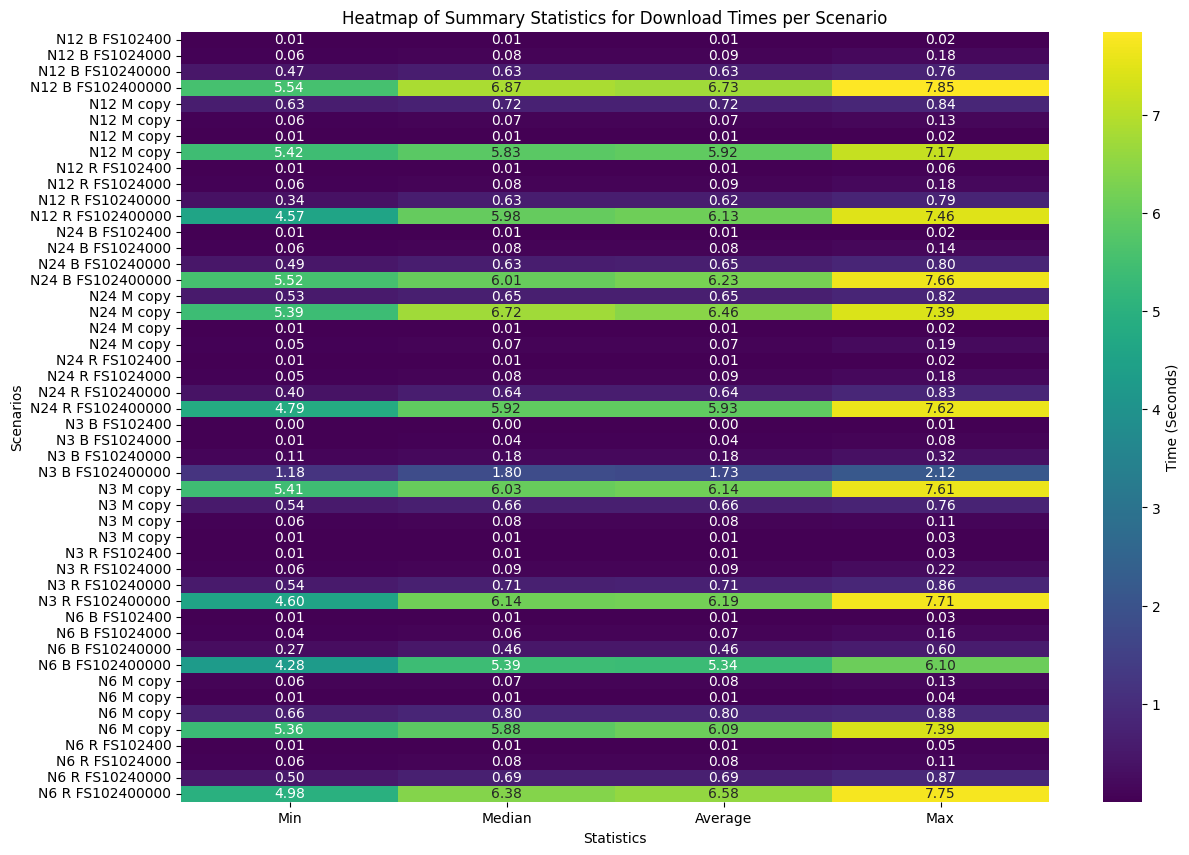

In [32]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the JSON data
with open('testresult.json', 'r') as file:
    data = json.load(file)

# Function to calculate the summary statistics
def calculate_summary_stats(times):
    return {
        'Min': np.min(times),
        'Median': np.median(times),
        'Average': np.mean(times),
        'Max': np.max(times)
    }

# Function to create a more readable scenario name
def create_readable_name(scenario):
    parts = scenario.split('_')
    node_part = parts[0].replace('Nodes:', 'N')
    operation_part = parts[1].replace('Operation:', '')
    operation_abbr = ''.join([word[0].upper() for word in operation_part.split()])
    file_size_part = parts[2].replace('filesize:', 'FS')
    readable_name = f"{node_part} {operation_abbr} {file_size_part}"
    return readable_name

# Initialize a list to store the data
heatmap_data = []

# Process data for each scenario
for scenario, values in data.items():
    # Get the summary statistics
    stats = calculate_summary_stats(values['download_time'])
    stats['Scenario'] = create_readable_name(scenario)
    heatmap_data.append(stats)

# Convert the data into a DataFrame
df = pd.DataFrame(heatmap_data)

# Set the 'Scenario' column as the index
df.set_index('Scenario', inplace=True)

# Sort the DataFrame by index (Scenario names)
df.sort_index(inplace=True)

# Using seaborn to create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Time (Seconds)'})

# Add labels and a title
plt.title('Heatmap of Summary Statistics for Download Times per Scenario')
plt.xlabel('Statistics')
plt.ylabel('Scenarios')

# Show the plot
plt.show()


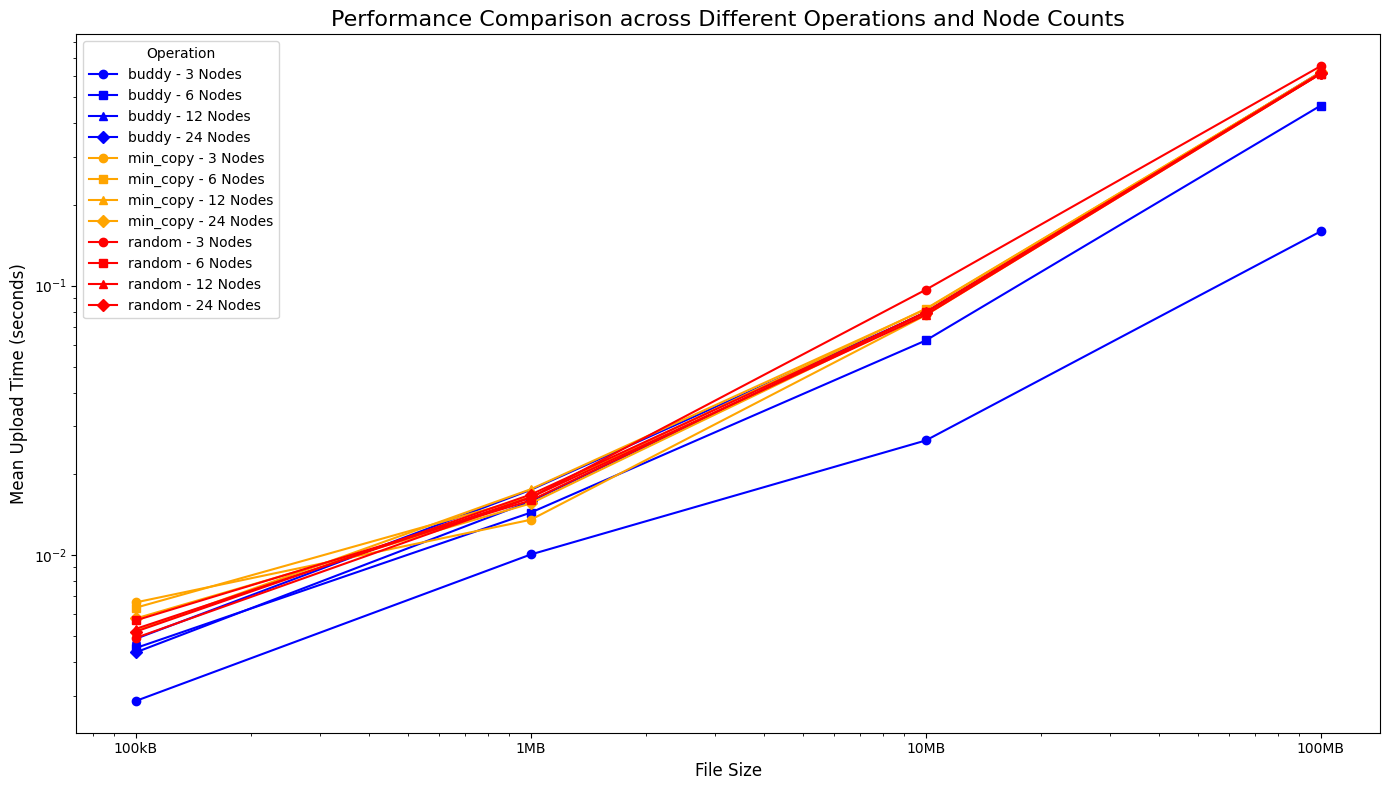

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data from the three screenshots provided by the user as Python dictionaries
data1 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["random"]*4 + ["random"]*4 + ["random"]*4 + ["random"]*4,
    "Mean": [0.004911, 0.016301, 0.096468, 0.653503, 0.005705, 0.015917, 0.079719, 0.612934, 0.005304, 0.016342, 0.077774, 0.611855, 0.005183, 0.016732, 0.079321, 0.616742]
}

data2 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["buddy"]*4 + ["buddy"]*4 + ["buddy"]*4 + ["buddy"]*4,
    "Mean": [0.002863, 0.010022, 0.026576, 0.159003, 0.004502, 0.014342, 0.062506, 0.466279, 0.004873, 0.017423, 0.079253, 0.620703, 0.004338, 0.015794, 0.079711, 0.613883]
}

data3 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["min_copy"]*4 + ["min_copy"]*4 + ["min_copy"]*4 + ["min_copy"]*4,
    "Mean": [0.006653, 0.013489, 0.077627, 0.612922, 0.006357, 0.016384, 0.081962, 0.615913, 0.005218, 0.017512, 0.081603, 0.618418, 0.005797, 0.01551, 0.079134, 0.621252]
}

# Convert the dictionaries to pandas DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)


# Convert filesize strings to integers (bytes)
for df in [df1, df2, df3]:
    df['Filesize'] = df['Filesize'].astype(int)

# Concatenate the dataframes into a single dataframe for easier plotting
df_all = pd.concat([df1, df2, df3])

# Pivot the combined dataframe to have operations as columns for each filesize and node count
df_pivot = df_all.pivot_table(index=["Nodes", "Filesize"], columns="Operation", values="Mean")

# Sort the index by filesize to ensure the x-ticks are in the correct order
df_pivot = df_pivot.sort_index()

# Define different markers for the different node counts
markers = {3: 'o', 6: 's', 12: '^', 24: 'D'}  # o: circle, s: square, ^: triangle_up, D: diamond
colors = ['blue', 'orange', 'red']  # Different color for each operation

# Plotting with different colors and markers for each operation
fig, ax = plt.subplots(figsize=(14, 8))

# Iterate over the operations and plot each with a different color and marker
for operation in df_pivot.columns:
    for nodes in markers:
        df_subset = df_pivot.xs(nodes, level='Nodes')[operation]
        ax.plot(df_subset.index.get_level_values('Filesize'), df_subset.values,
                marker=markers[nodes], linestyle='-', color=colors[df_pivot.columns.tolist().index(operation)],
                label=f'{operation} - {nodes} Nodes')

# Set custom x-ticks and labels
ax.set_xscale('log')
ax.set_xticks([102400, 1024000, 10240000, 102400000])
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x/1024 if x < 1024000 else x/1024000)))
ax.set_xticklabels(['100kB', '1MB', '10MB', '100MB'])

ax.set_xlabel('File Size', fontsize=12)
ax.set_ylabel('Mean Upload Time (seconds)', fontsize=12)
ax.set_title('Performance Comparison across Different Operations and Node Counts', fontsize=16)

plt.yscale('log')  # Mean times span several orders of magnitude, log scale will be better
#plt.legend(title='Operation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title='Operation', loc='upper left')

plt.tight_layout()
plt.show()

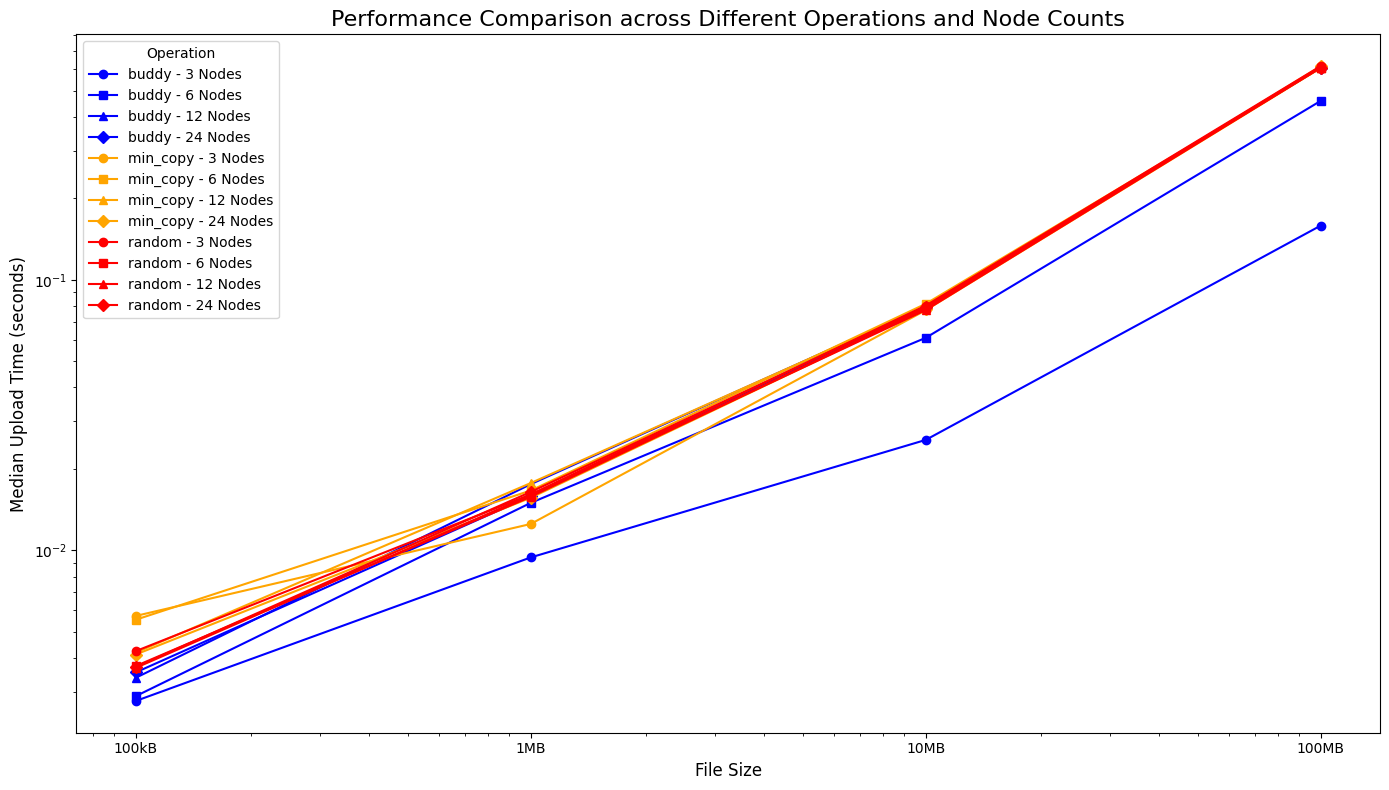

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data from the three screenshots provided by the user as Python dictionaries
data1 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["random"]*4 + ["random"]*4 + ["random"]*4 + ["random"]*4,
    "Median": [0.004245, 0.016105, 0.080269, 0.616067, 0.003739, 0.015788, 0.078377, 0.608413, 0.003682, 0.016013, 0.077295, 0.608118, 0.003708, 0.01645, 0.079423, 0.608647]
}

data2 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["buddy"]*4 + ["buddy"]*4 + ["buddy"]*4 + ["buddy"]*4,
    "Median":[0.002778, 0.009422, 0.025607, 0.158584, 0.002894, 0.014986, 0.061033, 0.458318, 0.003383, 0.017573, 0.079711, 0.610787, 0.003542, 0.015872, 0.079115, 0.6071]

}

data3 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["min_copy"]*4 + ["min_copy"]*4 + ["min_copy"]*4 + ["min_copy"]*4,
    "Median": [0.005727, 0.012524, 0.077196, 0.606171, 0.005545, 0.016645, 0.081513, 0.607195, 0.004193, 0.017739, 0.07943, 0.612346, 0.004125, 0.015649, 0.078158, 0.615549]


}

# Convert the dictionaries to pandas DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)


# Convert filesize strings to integers (bytes)
for df in [df1, df2, df3]:
    df['Filesize'] = df['Filesize'].astype(int)

# Concatenate the dataframes into a single dataframe for easier plotting
df_all = pd.concat([df1, df2, df3])

# Pivot the combined dataframe to have operations as columns for each filesize and node count
df_pivot = df_all.pivot_table(index=["Nodes", "Filesize"], columns="Operation", values="Median")

# Sort the index by filesize to ensure the x-ticks are in the correct order
df_pivot = df_pivot.sort_index()

# Define different markers for the different node counts
markers = {3: 'o', 6: 's', 12: '^', 24: 'D'}  # o: circle, s: square, ^: triangle_up, D: diamond
colors = ['blue', 'orange', 'red']  # Different color for each operation

# Plotting with different colors and markers for each operation
fig, ax = plt.subplots(figsize=(14, 8))

# Iterate over the operations and plot each with a different color and marker
for operation in df_pivot.columns:
    for nodes in markers:
        df_subset = df_pivot.xs(nodes, level='Nodes')[operation]
        ax.plot(df_subset.index.get_level_values('Filesize'), df_subset.values,
                marker=markers[nodes], linestyle='-', color=colors[df_pivot.columns.tolist().index(operation)],
                label=f'{operation} - {nodes} Nodes')

# Set custom x-ticks and labels
ax.set_xscale('log')
ax.set_xticks([102400, 1024000, 10240000, 102400000])
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x/1024 if x < 1024000 else x/1024000)))
ax.set_xticklabels(['100kB', '1MB', '10MB', '100MB'])

ax.set_xlabel('File Size', fontsize=12)
ax.set_ylabel('Median Upload Time (seconds)', fontsize=12)
ax.set_title('Performance Comparison across Different Operations and Node Counts', fontsize=16)

plt.yscale('log')  # Mean times span several orders of magnitude, log scale will be better
#plt.legend(title='Operation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title='Operation', loc='upper left')

plt.tight_layout()
plt.show()

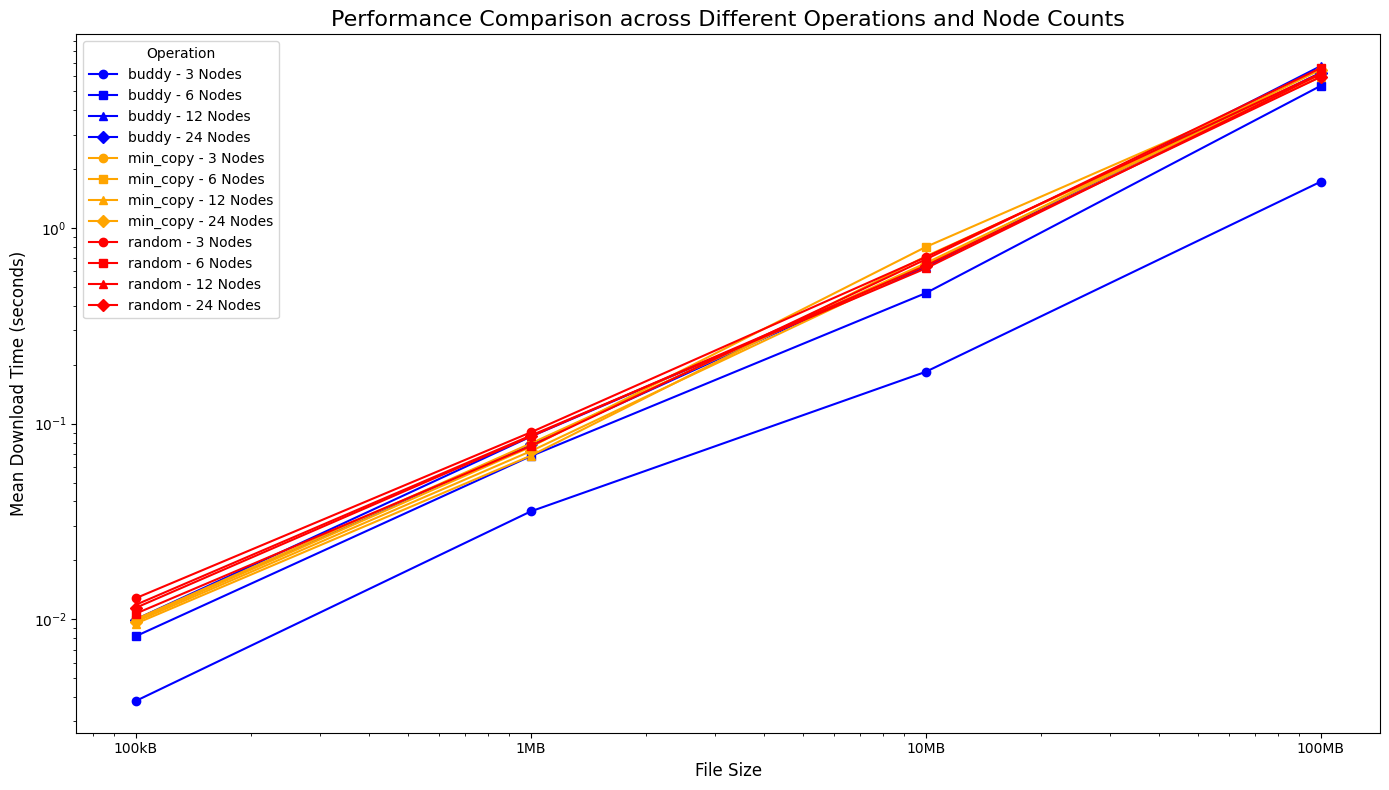

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data from the three screenshots provided by the user as Python dictionaries
data1 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["random"]*4 + ["random"]*4 + ["random"]*4 + ["random"]*4,
    "Mean": [0.012806, 0.090248, 0.709642, 6.189536, 0.010678, 0.076791, 0.691553, 6.582467, 0.011847, 0.086892, 0.621787, 6.130300, 0.011435, 0.085985, 0.641922, 5.930629]
}

data2 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["buddy"]*4 + ["buddy"]*4 + ["buddy"]*4 + ["buddy"]*4,
    "Mean": [0.003819, 0.035576, 0.184033, 1.725770, 0.008184, 0.068195, 0.464784, 5.335839, 0.009980, 0.085817, 0.630935, 6.730647, 0.009950, 0.078348, 0.647805, 6.228585]
}

data3 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["min_copy"]*4 + ["min_copy"]*4 + ["min_copy"]*4 + ["min_copy"]*4,
    "Mean": [0.009996, 0.079174, 0.661370, 6.138212, 0.009875, 0.076017, 0.800104, 6.091198, 0.009490, 0.068520, 0.716506, 5.921486, 0.009706, 0.072285, 0.651183, 6.456824]
}

# Convert the dictionaries to pandas DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)


# Convert filesize strings to integers (bytes)
for df in [df1, df2, df3]:
    df['Filesize'] = df['Filesize'].astype(int)

# Concatenate the dataframes into a single dataframe for easier plotting
df_all = pd.concat([df1, df2, df3])

# Pivot the combined dataframe to have operations as columns for each filesize and node count
df_pivot = df_all.pivot_table(index=["Nodes", "Filesize"], columns="Operation", values="Mean")

# Sort the index by filesize to ensure the x-ticks are in the correct order
df_pivot = df_pivot.sort_index()

# Define different markers for the different node counts
markers = {3: 'o', 6: 's', 12: '^', 24: 'D'}  # o: circle, s: square, ^: triangle_up, D: diamond
colors = ['blue', 'orange', 'red']  # Different color for each operation

# Plotting with different colors and markers for each operation
fig, ax = plt.subplots(figsize=(14, 8))

# Iterate over the operations and plot each with a different color and marker
for operation in df_pivot.columns:
    for nodes in markers:
        df_subset = df_pivot.xs(nodes, level='Nodes')[operation]
        ax.plot(df_subset.index.get_level_values('Filesize'), df_subset.values,
                marker=markers[nodes], linestyle='-', color=colors[df_pivot.columns.tolist().index(operation)],
                label=f'{operation} - {nodes} Nodes')

# Set custom x-ticks and labels
ax.set_xscale('log')
ax.set_xticks([102400, 1024000, 10240000, 102400000])
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x/1024 if x < 1024000 else x/1024000)))
ax.set_xticklabels(['100kB', '1MB', '10MB', '100MB'])

ax.set_xlabel('File Size', fontsize=12)
ax.set_ylabel('Mean Download Time (seconds)', fontsize=12)
ax.set_title('Performance Comparison across Different Operations and Node Counts', fontsize=16)

plt.yscale('log')  # Mean times span several orders of magnitude, log scale will be better
plt.legend(title='Operation', loc='upper left')
plt.tight_layout()
plt.show()

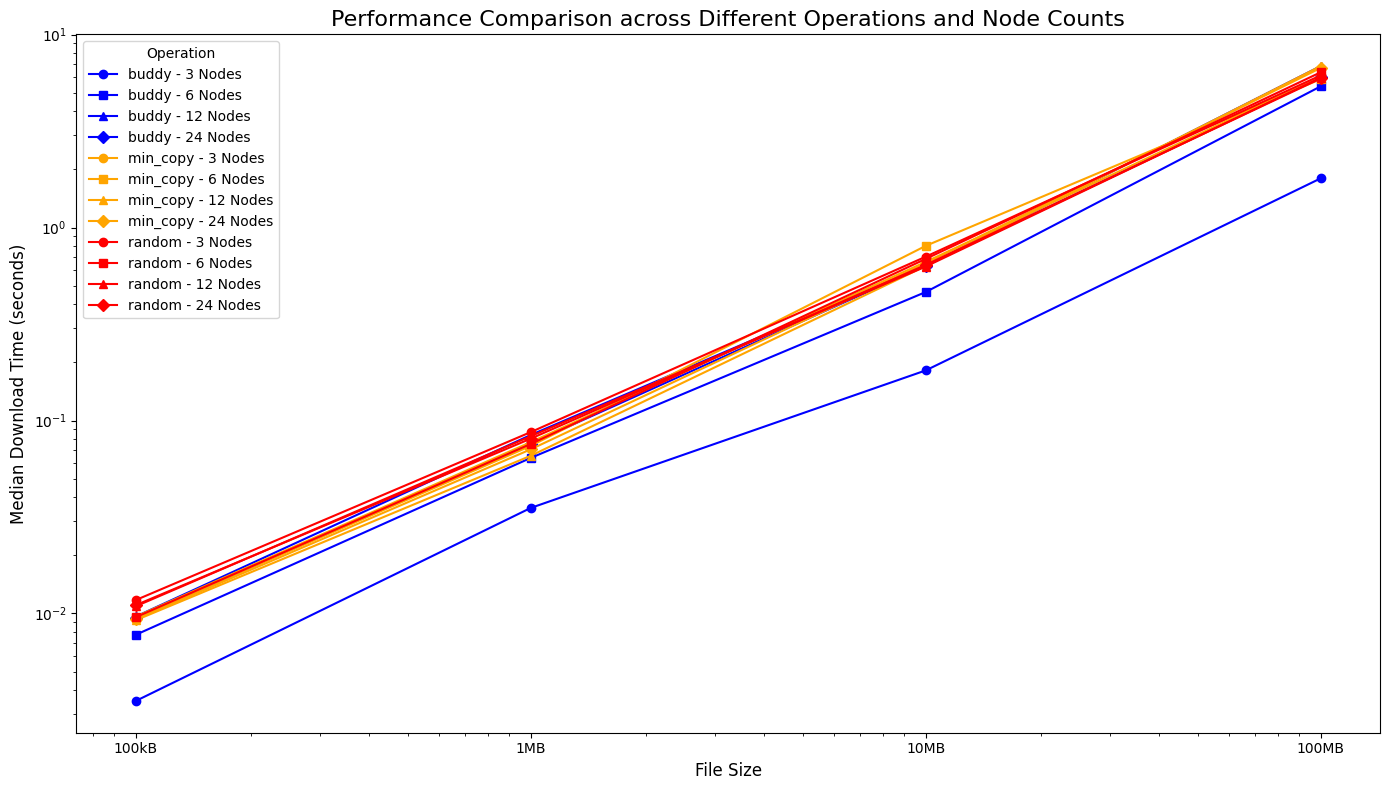

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data from the three screenshots provided by the user as Python dictionaries
data1 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["random"]*4 + ["random"]*4 + ["random"]*4 + ["random"]*4,
    "Median": [0.011735, 0.087075, 0.706146, 6.142883, 0.009568, 0.075580, 0.688128, 6.376532, 0.010898, 0.082926, 0.627952, 5.983543, 0.011043, 0.080548, 0.640287, 5.924529]
}

data2 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["buddy"]*4 + ["buddy"]*4 + ["buddy"]*4 + ["buddy"]*4,
    "Median":[0.003521, 0.035234, 0.181823, 1.799199, 0.007755, 0.064008, 0.463296, 5.393221, 0.009641, 0.084115, 0.631780, 6.865227, 0.009426, 0.075998, 0.634666, 6.009884]

}

data3 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["min_copy"]*4 + ["min_copy"]*4 + ["min_copy"]*4 + ["min_copy"]*4,
    "Median": [0.009636, 0.077260, 0.663927, 6.027983, 0.009478, 0.073862, 0.803674, 5.875640, 0.009228, 0.065655, 0.631780, 6.865227, 0.009326, 0.070899, 0.652711, 6.716032]


}

# Convert the dictionaries to pandas DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)


# Convert filesize strings to integers (bytes)
for df in [df1, df2, df3]:
    df['Filesize'] = df['Filesize'].astype(int)

# Concatenate the dataframes into a single dataframe for easier plotting
df_all = pd.concat([df1, df2, df3])

# Pivot the combined dataframe to have operations as columns for each filesize and node count
df_pivot = df_all.pivot_table(index=["Nodes", "Filesize"], columns="Operation", values="Median")

# Sort the index by filesize to ensure the x-ticks are in the correct order
df_pivot = df_pivot.sort_index()

# Define different markers for the different node counts
markers = {3: 'o', 6: 's', 12: '^', 24: 'D'}  # o: circle, s: square, ^: triangle_up, D: diamond
colors = ['blue', 'orange', 'red']  # Different color for each operation

# Plotting with different colors and markers for each operation
fig, ax = plt.subplots(figsize=(14, 8))

# Iterate over the operations and plot each with a different color and marker
for operation in df_pivot.columns:
    for nodes in markers:
        df_subset = df_pivot.xs(nodes, level='Nodes')[operation]
        ax.plot(df_subset.index.get_level_values('Filesize'), df_subset.values,
                marker=markers[nodes], linestyle='-', color=colors[df_pivot.columns.tolist().index(operation)],
                label=f'{operation} - {nodes} Nodes')

# Set custom x-ticks and labels
ax.set_xscale('log')
ax.set_xticks([102400, 1024000, 10240000, 102400000])
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x/1024 if x < 1024000 else x/1024000)))
ax.set_xticklabels(['100kB', '1MB', '10MB', '100MB'])

ax.set_xlabel('File Size', fontsize=12)
ax.set_ylabel('Median Download Time (seconds)', fontsize=12)
ax.set_title('Performance Comparison across Different Operations and Node Counts', fontsize=16)

plt.yscale('log')  # Mean times span several orders of magnitude, log scale will be better
plt.legend(title='Operation', loc='upper left')
plt.tight_layout()
plt.show()

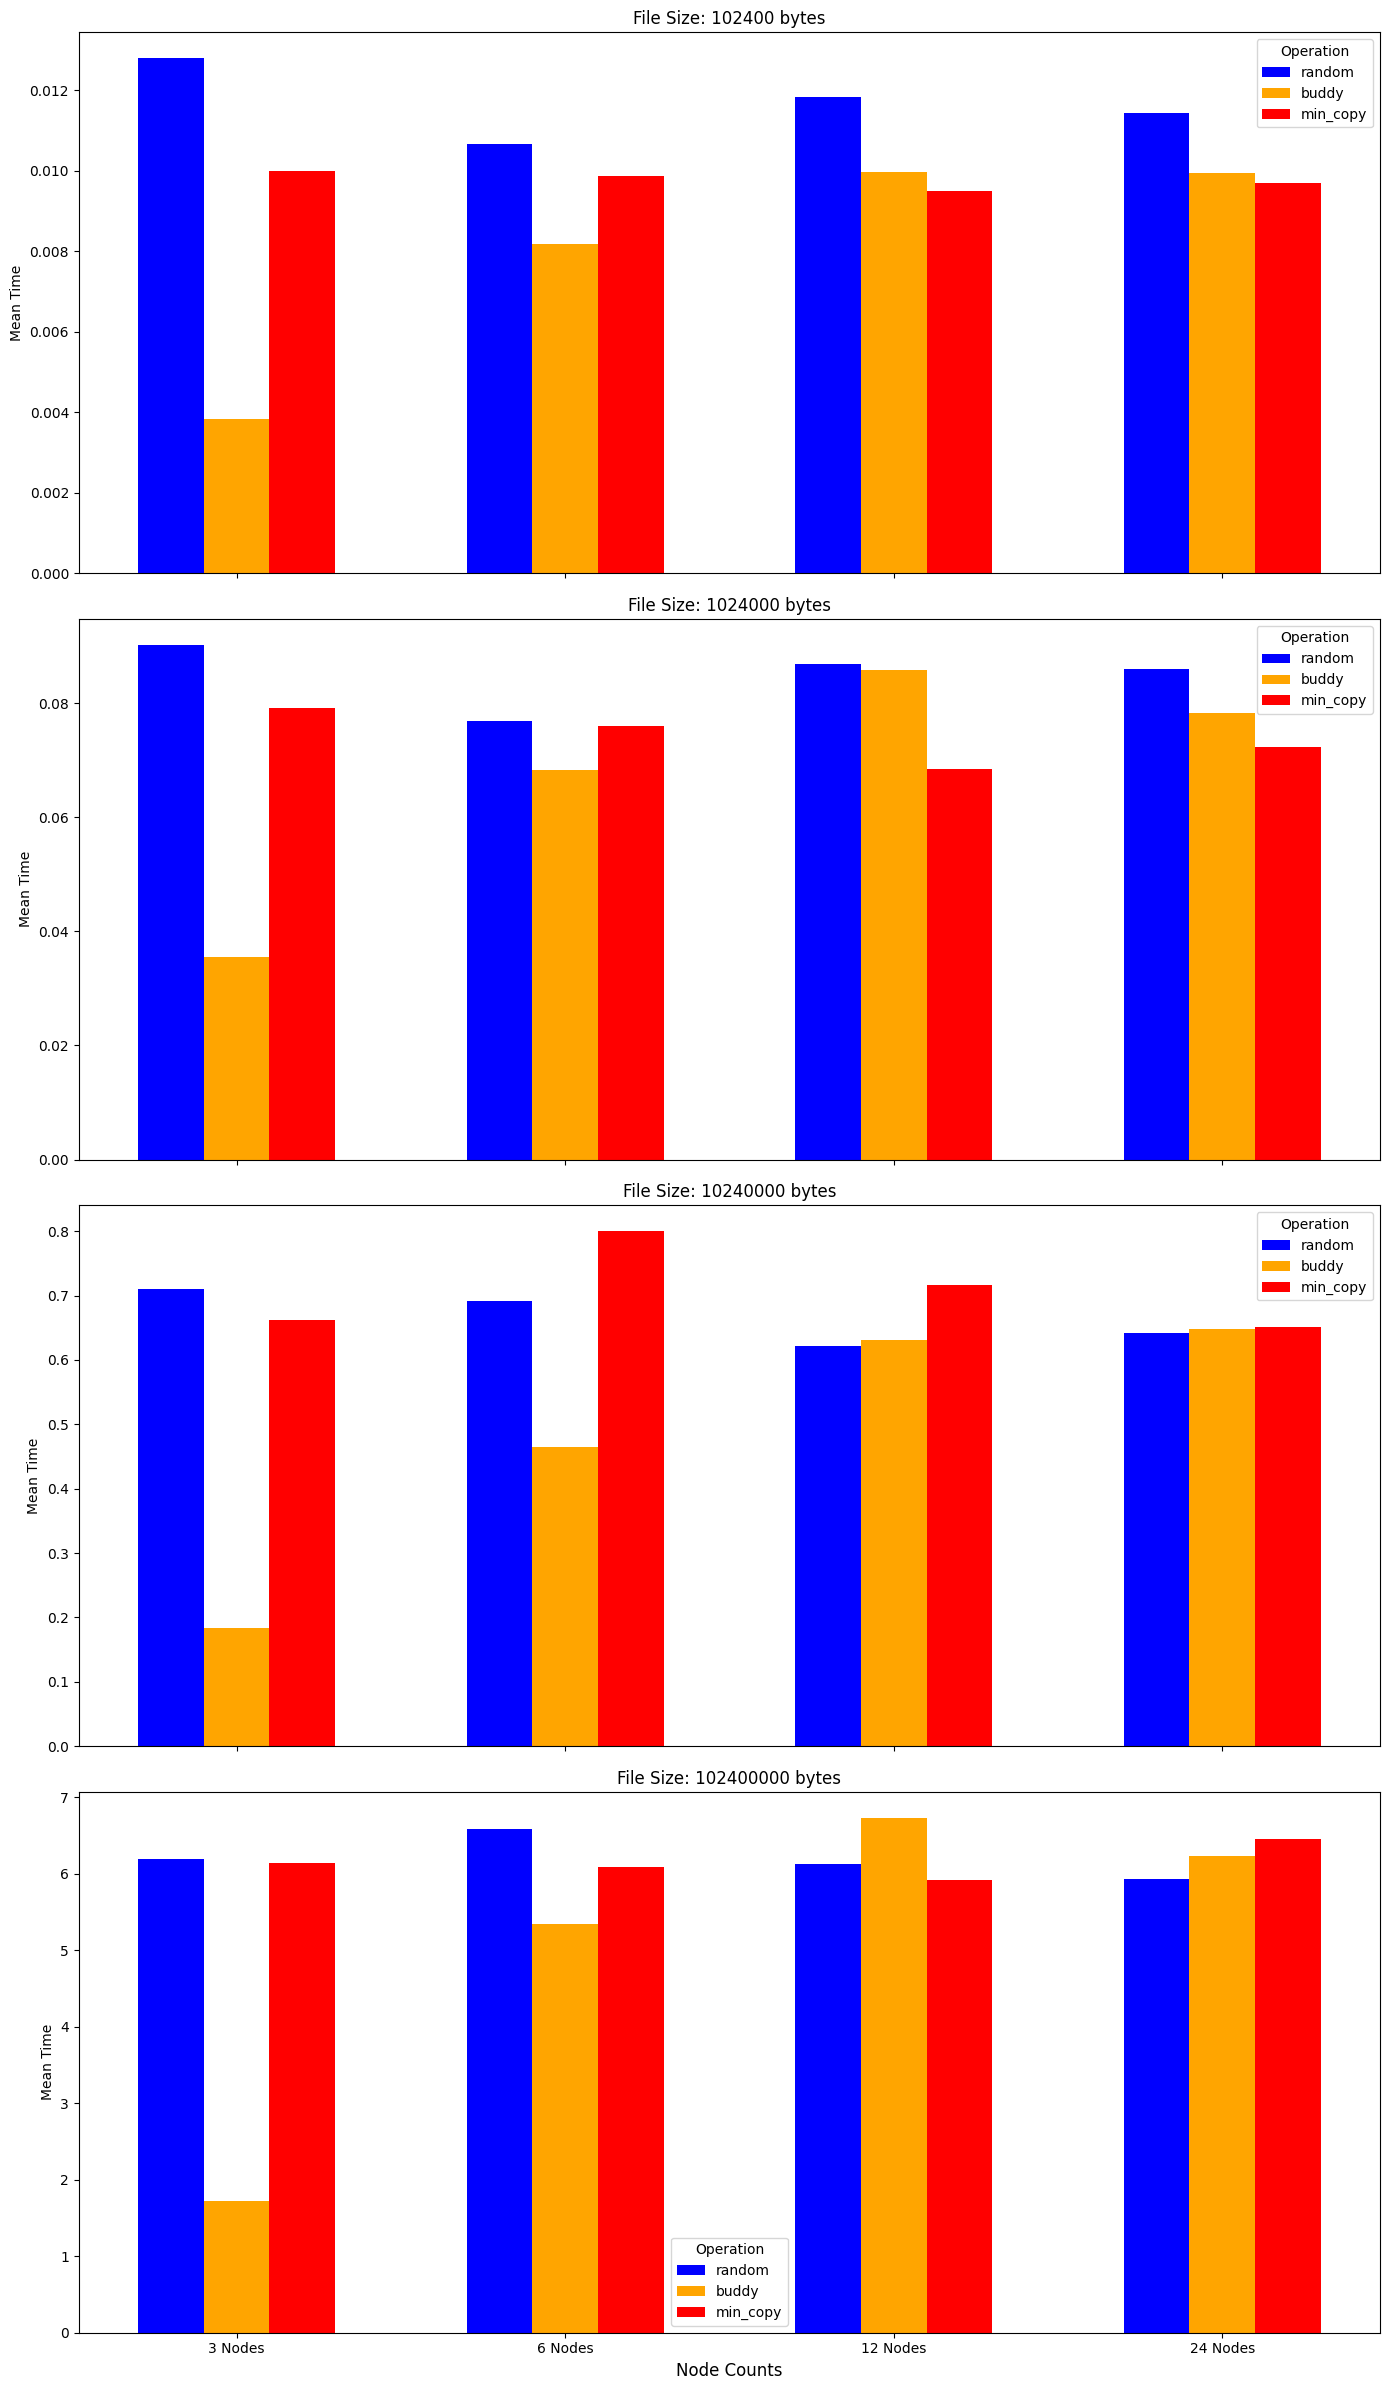

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data from the three screenshots provided by the user as Python dictionaries
data1 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["random"]*4 + ["random"]*4 + ["random"]*4 + ["random"]*4,
    "Mean": [0.012806, 0.090248, 0.709642, 6.189536, 0.010678, 0.076791, 0.691553, 6.582467, 0.011847, 0.086892, 0.621787, 6.130300, 0.011435, 0.085985, 0.641922, 5.930629]
}

data2 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["buddy"]*4 + ["buddy"]*4 + ["buddy"]*4 + ["buddy"]*4,
    "Mean": [0.003819, 0.035576, 0.184033, 1.725770, 0.008184, 0.068195, 0.464784, 5.335839, 0.009980, 0.085817, 0.630935, 6.730647, 0.009950, 0.078348, 0.647805, 6.228585]
}

data3 = {
    "Nodes": [3, 3, 3, 3, 6, 6, 6, 6, 12, 12, 12, 12, 24, 24, 24, 24],
    "Filesize": ["102400", "1024000", "10240000", "102400000"]*4,
    "Operation": ["min_copy"]*4 + ["min_copy"]*4 + ["min_copy"]*4 + ["min_copy"]*4,
    "Mean": [0.009996, 0.079174, 0.661370, 6.138212, 0.009875, 0.076017, 0.800104, 6.091198, 0.009490, 0.068520, 0.716506, 5.921486, 0.009706, 0.072285, 0.651183, 6.456824]
}

# Convert the dictionaries to pandas DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

# Concatenate the dataframes into a single dataframe for easier plotting
df_all = pd.concat([df1, df2, df3])

# For a bar chart, we'll need to modify the approach. We'll plot separate bar charts for each file size
# with different colors for each operation.

# Let's create a bar chart for each file size. For clarity, we'll create subplots for each node count.
node_counts = df_all['Nodes'].unique()
file_sizes = df_all['Filesize'].unique()
operations = df_all['Operation'].unique()
colors = ['blue', 'orange', 'red']  # Different color for each operation

# Create subplots - one row for each file size
fig, axes = plt.subplots(nrows=len(file_sizes), ncols=1, figsize=(14, 6 * len(file_sizes)), sharex=True)

# Flatten the axes array for easy indexing
if len(file_sizes) > 1:
    axes = axes.flatten()

# Loop over each file size to create a bar chart
for i, file_size in enumerate(file_sizes):
    # Select the relevant data for the current file size
    ax = axes[i]
    for j, operation in enumerate(operations):
        # Data for the bar chart
        data_for_bar = df_all[(df_all['Filesize'] == file_size) & (df_all['Operation'] == operation)]
        # We need to ensure the bars for each node count are side by side, hence the position adjustment
        positions = range(len(node_counts))
        ax.bar([p + 0.2 * (j - 1) for p in positions], data_for_bar['Mean'], width=0.2, color=colors[j], label=operation)

    ax.set_title(f'File Size: {file_size} bytes')
    ax.set_ylabel('Mean Time')
    ax.set_xticks(positions)
    ax.set_xticklabels([f'{nodes} Nodes' for nodes in node_counts])
    ax.legend(title='Operation')

# Set a common X label
plt.xlabel('Node Counts', fontsize=12)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the JSON data
with open('testresult.json', 'r') as file:
    data = json.load(file)

# Function to calculate the average and median times
def calculate_stats(times):
    return np.mean(times), np.median(times)

# Function to plot histogram and mark average and median
def plot_times_histogram(times, scenario, operation_type='download'):
    avg_time, median_time = calculate_stats(times)
    
    plt.figure(figsize=(10, 6))
    plt.hist(times, bins=20, color='skyblue', alpha=0.7)
    plt.axvline(avg_time, color='red', linestyle='dashed', linewidth=1, label=f'Average: {avg_time:.4f}')
    plt.axvline(median_time, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_time:.4f}')
    plt.title(f'Histogram of {operation_type.capitalize()} Times for {scenario}')
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Analyze data
for scenario, values in data.items():
    # Extract download and upload times
    download_times = values['download_time']
    upload_times = values['upload_time']
    
    # Plot histograms for download and upload times
    plot_times_histogram(download_times, scenario, operation_type='download')
    plot_times_histogram(upload_times, scenario, operation_type='upload')



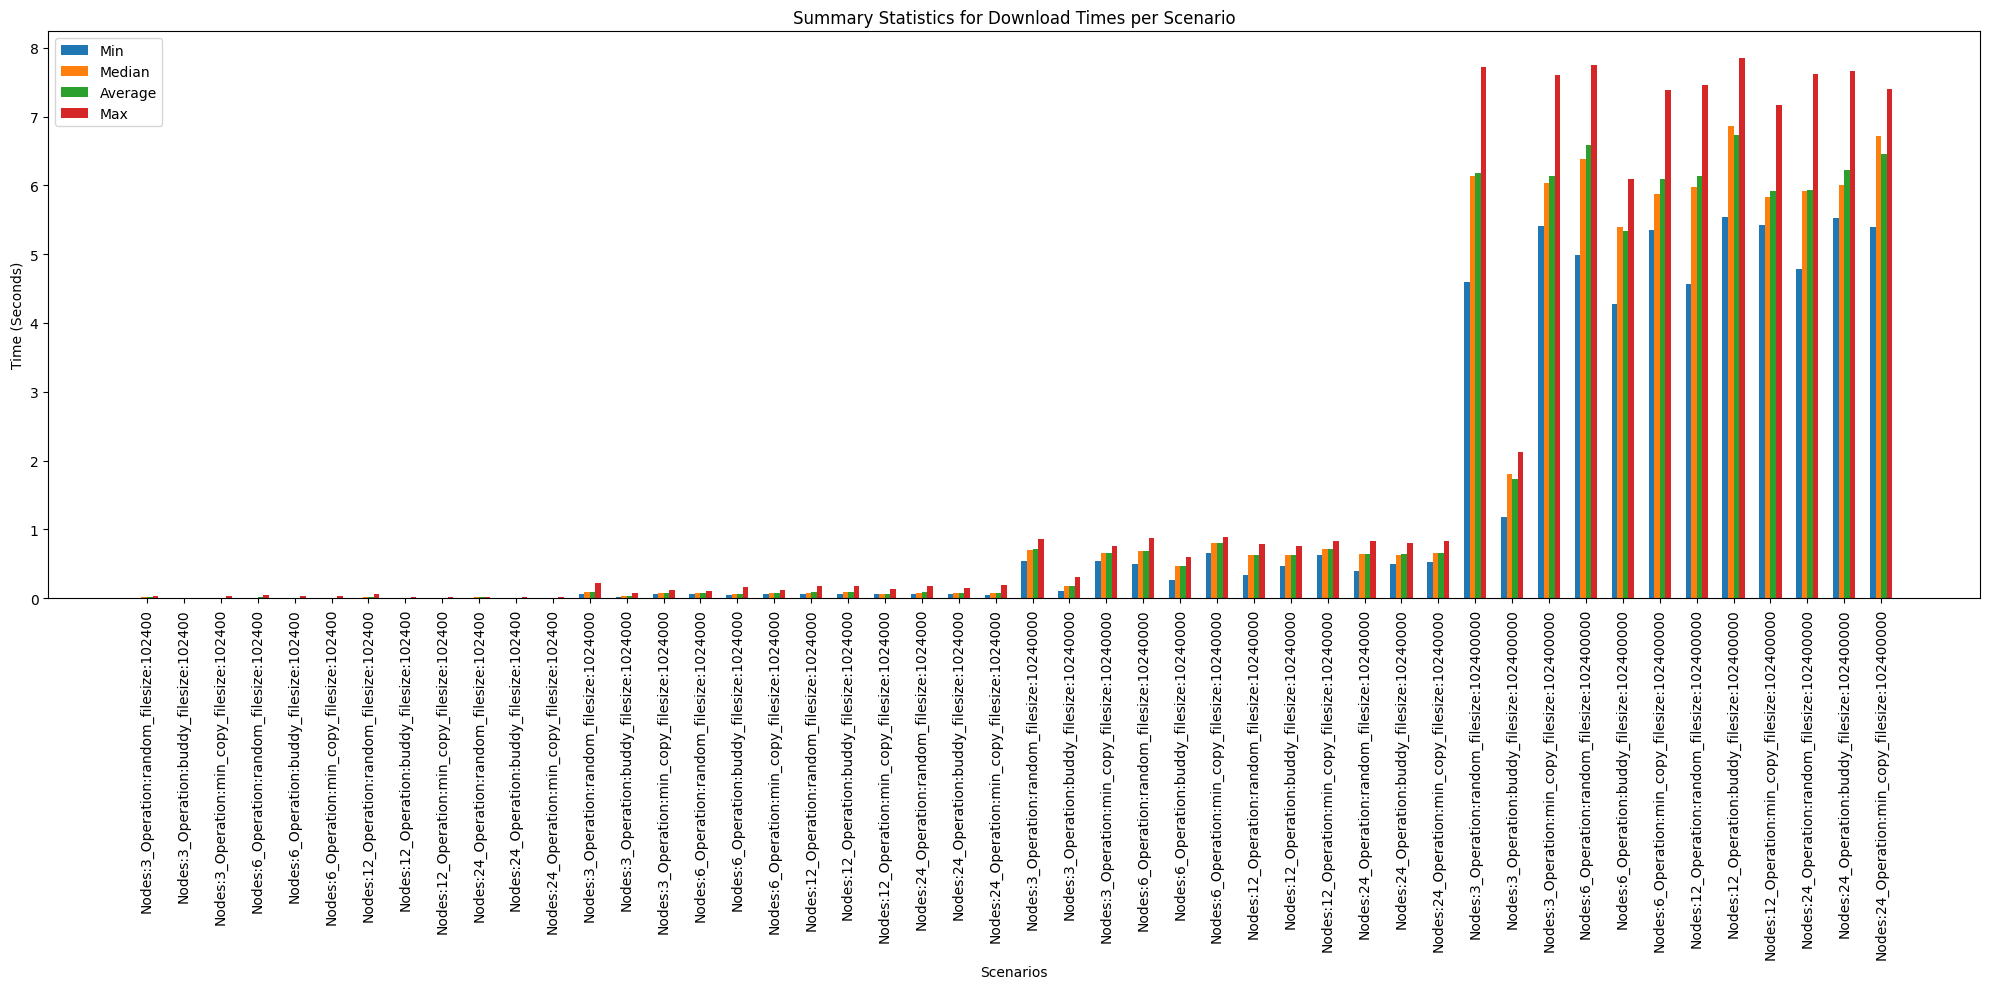

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the JSON data
with open('testresult.json', 'r') as file:
    data = json.load(file)

# Function to calculate the summary statistics
def calculate_summary_stats(times):
    return np.min(times), np.median(times), np.mean(times), np.max(times)

# Function to extract and return the file size in bytes from the scenario name
def extract_file_size(scenario):
    size_part = scenario.split('_')[-1]
    size_in_bytes = int(size_part.split(':')[1])
    return size_in_bytes

# Initialize lists to store data for plotting
scenario_data = []

# Process data for each scenario
for scenario, values in data.items():
    # Calculate summary statistics
    min_time, median_time, avg_time, max_time = calculate_summary_stats(values['download_time'])
    
    # Get the file size in bytes to use for sorting
    file_size_in_bytes = extract_file_size(scenario)
    
    # Append data for plotting
    scenario_data.append({
        'scenario': scenario,
        'min': min_time,
        'median': median_time,
        'average': avg_time,
        'max': max_time,
        'file_size': file_size_in_bytes  # Include file size for sorting
    })

# Sort scenarios by file size
scenario_data.sort(key=lambda x: x['file_size'])

# Separate the data into individual lists for plotting
scenarios = [d['scenario'] for d in scenario_data]
min_times = [d['min'] for d in scenario_data]
median_times = [d['median'] for d in scenario_data]
average_times = [d['average'] for d in scenario_data]
max_times = [d['max'] for d in scenario_data]

# Create an array with the position of each group of bars
bar_width = 0.15
indices = np.arange(len(scenarios))

# Plotting
plt.figure(figsize=(20, 10))

plt.bar(indices - bar_width*1.5, min_times, bar_width, label='Min')
plt.bar(indices - bar_width/2, median_times, bar_width, label='Median')
plt.bar(indices + bar_width/2, average_times, bar_width, label='Average')
plt.bar(indices + bar_width*1.5, max_times, bar_width, label='Max')

# Add labels, title, and legend
plt.xlabel('Scenarios')
plt.ylabel('Time (Seconds)')
plt.title('Summary Statistics for Download Times per Scenario')
plt.xticks(indices, scenarios, rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the padding to make room for the rotated x-labels
plt.show()


In [8]:
import os
import shutil

# Specify the source directory where the PNG files are located
source_directory = 'E:/DS/Distributed_storage'

# Specify the destination directory where you want to move the PNG files
destination_directory = 'E:/DS/Distributed_storage/Task1/plots/Upload/min_copy'

# Ensure the destination directory exists; create it if necessary
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Iterate through files in the source directory
for filename in os.listdir(source_directory):
    if filename.endswith('.png') and 'copy' in filename:
        # Construct the full path of the source file
        source_file = os.path.join(source_directory, filename)
        
        # Construct the full path of the destination file
        destination_file = os.path.join(destination_directory, filename)
        
        # Move the file to the destination directory
        shutil.move(source_file, destination_file)
        print(f"Moved {filename} to {destination_directory}")

print("All 'buddy' PNG files have been moved to the destination directory.")


Moved Nodes_12_Operation_min_copy_filesize_102400000_upload.png to E:/DS/Distributed_storage/Task1/plots/Upload/min_copy
Moved Nodes_12_Operation_min_copy_filesize_10240000_upload.png to E:/DS/Distributed_storage/Task1/plots/Upload/min_copy
Moved Nodes_12_Operation_min_copy_filesize_1024000_upload.png to E:/DS/Distributed_storage/Task1/plots/Upload/min_copy
Moved Nodes_12_Operation_min_copy_filesize_102400_upload.png to E:/DS/Distributed_storage/Task1/plots/Upload/min_copy
Moved Nodes_24_Operation_min_copy_filesize_102400000_upload.png to E:/DS/Distributed_storage/Task1/plots/Upload/min_copy
Moved Nodes_24_Operation_min_copy_filesize_10240000_upload.png to E:/DS/Distributed_storage/Task1/plots/Upload/min_copy
Moved Nodes_24_Operation_min_copy_filesize_1024000_upload.png to E:/DS/Distributed_storage/Task1/plots/Upload/min_copy
Moved Nodes_24_Operation_min_copy_filesize_102400_upload.png to E:/DS/Distributed_storage/Task1/plots/Upload/min_copy
Moved Nodes_3_Operation_min_copy_filesize_10